In [1]:
import sunpy.data.sample
import matplotlib.pyplot as plt
from astropy.io import fits
import astropy.units as u
from tqdm import tqdm
import numpy as np
import sunpy.map
import warnings
import glob
import os
warnings.filterwarnings("ignore")

**path_mag and  path_img_crop** they correspond to the addresses where the data cube to which you want to apply the rotation is located.
**THIS PROCESS IS NECESSARY TO MAKE A PROPER ALIGNMENT WHERE THE NORTH OF THE IMAGES COINCIDES WITH THE SOLAR NORTH**

In [8]:
wl = [94,131,171,193,211,304,335,1600,1700]
os.system('mkdir SDO')
for item in tqdm(wl,colour='green'):
    path_img_crop = '/home/javier/Documents/MSc-program/SDO_DATA_ALIGNIING/SDO/{}/crop/*.fits'.format(item)
    os.system('mkdir SDO/{}/crop_and_rotate'.format(item))
    x_croped_image_sun = sorted(glob.glob(path_img_crop))
    tmp                = sunpy.map.Map(x_croped_image_sun)
    print('Creating  sunpy Map AIA {}'.format(item))
    aia_seq              = []
    for i in range(0,len(tmp),1):    
        img= tmp[i].rotate(use_scipy=True, missing=0)
        aia_seq.append(img)
    
    new_files = [str('SDO/{}/crop_and_rotate/').format(item)+str('aia_{}_').format(fits.open(x_croped_image_sun[0])[0].header['WAVELNTH'])
                 +fits.open(x_croped_image_sun[a])[0].header['DATE-OBS']+
                 str('_crop_and_rotate.fits') for a in range(len(x_croped_image_sun))]
    
    for img, file_name in zip(aia_seq, new_files):
        img.save(file_name)

mkdir: cannot create directory ‘SDO’: File exists
  0%|          | 0/9 [00:00<?, ?it/s]mkdir: cannot create directory ‘SDO/94/crop_and_rotate’: File exists


Creating  sunpy Map AIA 94


 11%|█         | 1/9 [00:31<04:11, 31.48s/it]

Creating  sunpy Map AIA 131


 22%|██▏       | 2/9 [00:55<03:07, 26.81s/it]

Creating  sunpy Map AIA 171


 33%|███▎      | 3/9 [01:18<02:32, 25.40s/it]

Creating  sunpy Map AIA 193


 44%|████▍     | 4/9 [01:42<02:03, 24.65s/it]

Creating  sunpy Map AIA 211


 56%|█████▌    | 5/9 [02:05<01:37, 24.27s/it]

Creating  sunpy Map AIA 304


 67%|██████▋   | 6/9 [02:29<01:12, 24.02s/it]

Creating  sunpy Map AIA 335


 78%|███████▊  | 7/9 [02:52<00:47, 23.82s/it]

Creating  sunpy Map AIA 1600


 89%|████████▉ | 8/9 [03:04<00:19, 19.97s/it]

Creating  sunpy Map AIA 1700


100%|██████████| 9/9 [03:15<00:00, 21.76s/it]


In [9]:
os.system('mkdir SDO/magt')
os.system('mkdir SDO/magt/crop_and_rotate')
path_mag =     path_img_crop = '/home/javier/Documents/MSc-program/SDO_DATA_ALIGNIING/SDO/magt/crop/*.fits'
file_download = sorted(glob.glob(path_mag))
tmp           = sunpy.map.Map(file_download)
aia_seq       = []
for i in tqdm(range(0,len(tmp),1),colour='green'):
    img= tmp[i].rotate(use_scipy=True, missing=0)
    aia_seq.append(img)
new_files =  [str('SDO/magt/crop_and_rotate/')+str('HMI_') +fits.open(file_download[a])[0].header['DATE-OBS'][:-1]+
              str('_crop_and_rotate.fits') for a in range(len(file_download))]
for img, file_name in zip(aia_seq, new_files):
    img.save(file_name)

mkdir: cannot create directory ‘SDO/magt’: File exists
100%|██████████| 73/73 [00:07<00:00,  9.68it/s]


**IMAGE WITH ANGLE ROTATED OF 180 DEGREES** 

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2018-04-12 15:35:33
Exposure Time,1.999593 s
Dimension,[469. 468.] pix
Coordinate System,helioprojective
Scale,[0.599489 0.599489] arcsec / pix
Reference Pixel,[ 20.189941 -433.790039] pix

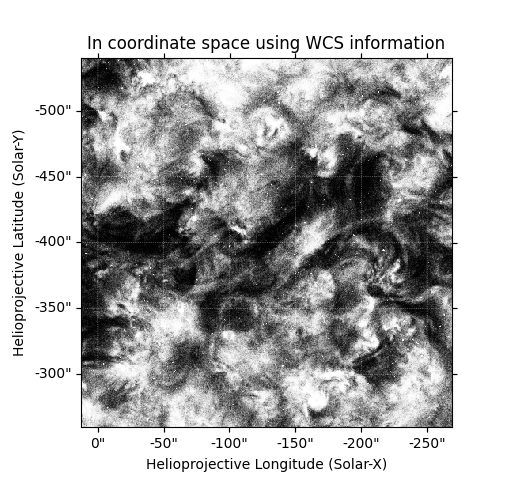
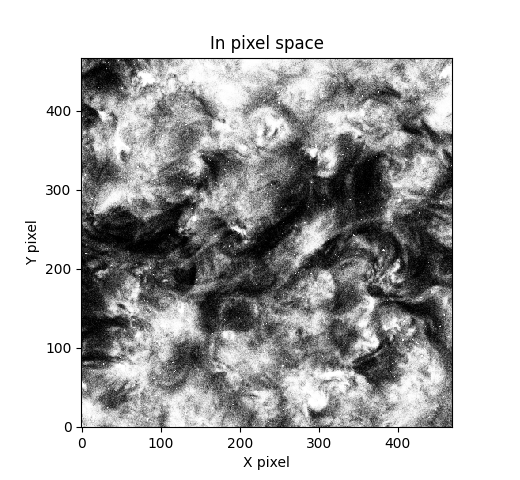
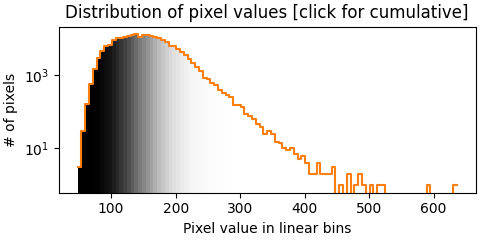
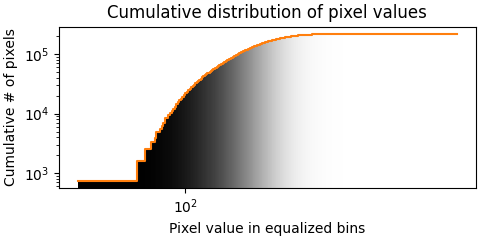

In [3]:
sunpy.map.Map('/home/javier/Documents/MSc-program/SDO_DATA_ALIGNIING/SDO/171/crop/aia_lev1_171a_2018_04_12t15_35_33_35z_image_lev1_crop_v1.fits')

**IMAGE WITHOUT ANGLE ROTATED OF 180 DEGREES** 

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,171.0 Angstrom
Wavelength,171.0 Angstrom
Observation Date,2018-04-12 15:35:33
Exposure Time,1.999593 s
Dimension,[471. 470.] pix
Coordinate System,helioprojective
Scale,[0.599489 0.599489] arcsec / pix
Reference Pixel,[448.58577204 901.86186245] pix

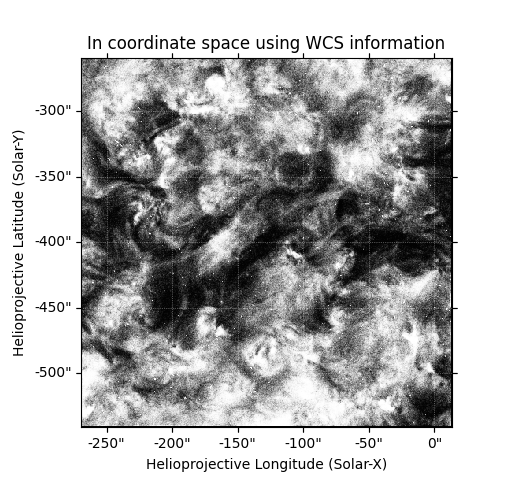
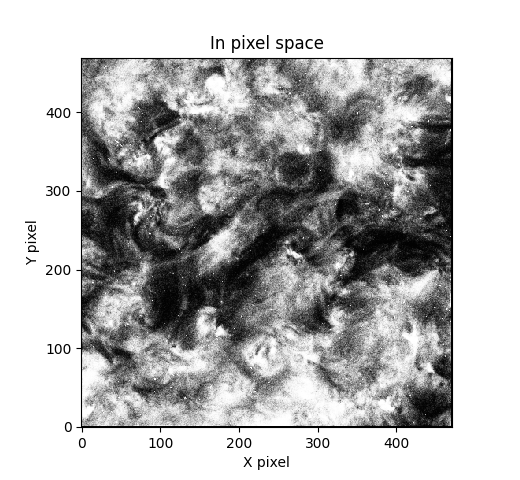
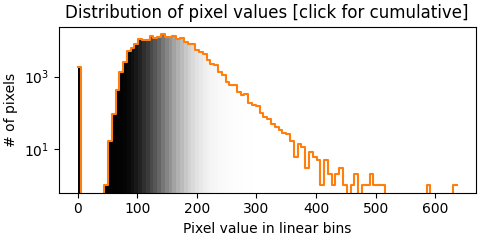
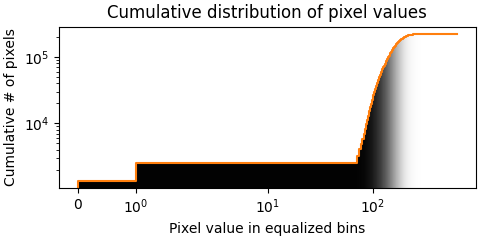

In [4]:
sunpy.map.Map('/home/javier/Documents/MSc-program/SDO_DATA_ALIGNIING/SDO/171/crop_and_rotate/aia_171_2018-04-12T15:35:33.35_crop_and_rotate.fits')